# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 4</span>

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def FileImport (nomefile=None, data_array=None, i=None):
    with open(nomefile) as fileinput:
        f=open(nomefile, 'r')
        lines=f.readlines()
        for x in lines:
            data_array.append(float(x.split()[i]))
        f.close()

# <span style="color:red">  Exercise 04.1 </span>

# Molecular Dynamics equilibration phase

In this exercise I modified the given MD code adding a boolean option in input file to choose if restart the simulation using not only the final configuration (file: <font face="Courier">config.final -> config.0</font>) but also the last but one configuration (file: <font face="Courier">old.final -> old.0</font>) in order to thermalize the system.

To create the first file *old.0* we have to: copy the correct input and config files, set restart option on 0 and run the short first simulation. 
Later on we can copy the saved old.final on old.0 and config.final on cofig.0 and set restart input option on 1. The restart options work as follow:

- if restart=0 the code starts only with the configuration $r(t)$ in <font face="Courier">config.0</font>. To find $r(t-dt)$, it takes random velocities (taking care not to drift the centre of mass of the system) and after a rescaling T-based ($fs = \sqrt {3 T}$) it calculates $r(t-dt)$ using  Periodic Boundaries Conditions ($Pbc$):

$$r(t-dt)=Pbc(r(t) - dt v_s)$$    

- if restart=1 the code imports both <font face="Courier">config.0</font> ($r(t)$) and <font face="Courier">old.0</font> ($r(t-dt)$) in which old.0 is the last configuration from the previous simulation.

    After multiplying by the box dimension, the code does a first call to the Move() function in which there is the Verlet algorithm implementation. 

    Move() calls Forces(particle_index, direction) which calculates $a(t)$, calculates $r(t+dt)$ and $v(t)$ with Verlet (and using Pbc) and modifies $r(t-dt)$ with $r(t)$ and then $r(t)$ with $r(t+dt)$. 
    
    Out of Move() function the code rescales $v(t)$ with the same scaling factor as above and modifies $r(t-dt)$ according to $v_{s}$.
    
    With restart=1 option, the Main also saves the last but one configuration of the simulation into <font face="Courier">old.final</font>.
    
    Below some example pictures made by GNUPLOT of the thermalization:

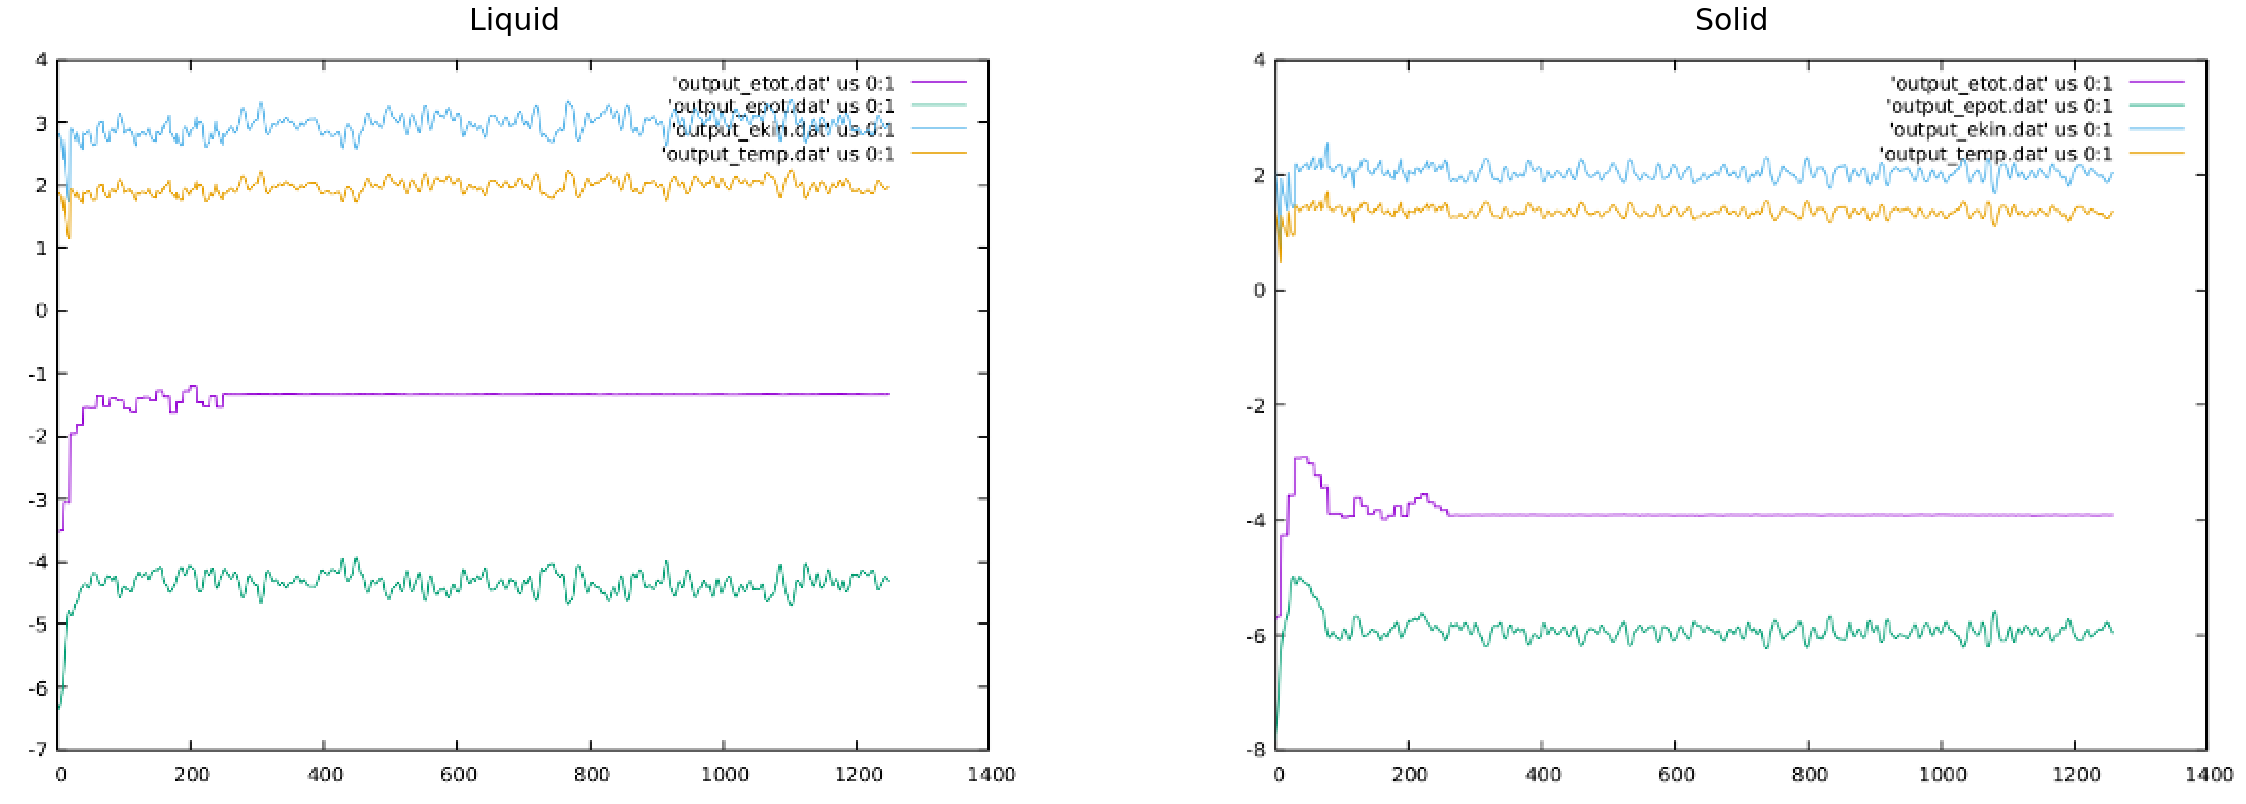

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picture1=plt.figure(figsize=(40, 40))
a1=plt.subplot(2, 2, 1)
img=mpimg.imread("../Es4/thermalization_examples/liquid.100.26/therm+sim.liquid.100.26.png")
imgplot=plt.imshow(img)
#plt.gcf().set_size_inches(40, 15)
plt.axis('off')
plt.title('Liquid', fontsize=30)

a2=plt.subplot(2, 2, 2)
img=mpimg.imread("../Es4/thermalization_examples/solid.100.26/therm+sim.solid.100.26.png")
imgplot=plt.imshow(img)
#plt.gcf().set_size_inches(40, 15)
plt.axis('off')
plt.title('Solid', fontsize=30)
plt.show()


From $0$ to $250$ I've made $25$ thermalization cycles of $10$ steps. Since the system had reached the desired temperature ($T^*=1.9$ for the liquid, $T^*=1.4$ for the solid) I started the simulation from step 300 to step 1300.

# <span style="color:red">  Exercise 04.2</span>

# Implementing blocking average on MD code

Fot this exercise I added the parts concerning the blocking average on observable of interest of the system to the MD code given. I stored on "output.*variablename*.dat" a column with the number of block, a column with the progressive mean value of the observable and a column with the relative error for potential energy per particle $u=U/N$, pressure $p$, kinetic energy per particle $k=K/N$, temperature $T$, total energy per particle $e=E/N$ and radial distribution function $g(r)$ (which will be used for the 7th exercise.

Below the data importations:

In [3]:
#defining variables for solid
x, u_sol_Ar, p_sol_Ar, k_sol_Ar, etot_sol_Ar, temp_sol_Ar = [], [], [], [], [], []
err_k_sol_Ar, err_etot_sol_Ar, err_temp_sol_Ar, err_u_sol_Ar, err_p_sol_Ar = [], [], [], [], []

#Importing data for solid
FileImport("../Es4/Data/Solid/output.epot.0", u_sol_Ar, 2)
FileImport("../Es4/Data/Solid/output.epot.0", x, 0)
FileImport("../Es4/Data/Solid/output.pres.0", p_sol_Ar, 2)
FileImport("../Es4/Data/Solid/output.epot.0", err_u_sol_Ar, 3)
FileImport("../Es4/Data/Solid/output.pres.0", err_p_sol_Ar, 3)
FileImport("../Es4/Data/Solid/output.ekin.0", k_sol_Ar, 2)
FileImport("../Es4/Data/Solid/output.ekin.0", err_k_sol_Ar, 3)
FileImport("../Es4/Data/Solid/output.etot.0", etot_sol_Ar, 2)
FileImport("../Es4/Data/Solid/output.etot.0", err_etot_sol_Ar, 3)
FileImport("../Es4/Data/Solid/output.temp.0", temp_sol_Ar, 2)
FileImport("../Es4/Data/Solid/output.temp.0", err_temp_sol_Ar, 3)

In [22]:
#defining variables for liquid
x, u_liq_Ar, p_liq_Ar, k_liq_Ar, etot_liq_Ar, temp_liq_Ar = [], [], [], [], [], []
err_k_liq_Ar, err_etot_liq_Ar, err_temp_liq_Ar, err_u_liq_Ar, err_p_liq_Ar = [], [], [], [], []

#Importing data for liquid
FileImport("../Es4/Data/Liquid/output.epot.0", u_liq_Ar, 2)
FileImport("../Es4/Data/Liquid/output.epot.0", x, 0)
FileImport("../Es4/Data/Liquid/output.pres.0", p_liq_Ar, 2)
FileImport("../Es4/Data/Liquid/output.epot.0", err_u_liq_Ar, 3)
FileImport("../Es4/Data/Liquid/output.pres.0", err_p_liq_Ar, 3)
FileImport("../Es4/Data/Liquid/output.ekin.0", k_liq_Ar, 2)
FileImport("../Es4/Data/Liquid/output.ekin.0", err_k_liq_Ar, 3)
FileImport("../Es4/Data/Liquid/output.etot.0", etot_liq_Ar, 2)
FileImport("../Es4/Data/Liquid/output.etot.0", err_etot_liq_Ar, 3)
FileImport("../Es4/Data/Liquid/output.temp.0", temp_liq_Ar, 2)
FileImport("../Es4/Data/Liquid/output.temp.0", err_temp_liq_Ar, 3)

In [29]:
#defining variables for gas
x, u_gas_Ar, p_gas_Ar, k_gas_Ar, etot_gas_Ar, temp_gas_Ar = [], [], [], [], [], []
err_k_gas_Ar, err_etot_gas_Ar, err_temp_gas_Ar, err_u_gas_Ar, err_p_gas_Ar = [], [], [], [], []

#Importing data for gas
FileImport("../Es4/Data/Gas/output.epot.0", u_gas_Ar, 2)
FileImport("../Es4/Data/Gas/output.epot.0", x, 0)
FileImport("../Es4/Data/Gas/output.pres.0", p_gas_Ar, 2)
FileImport("../Es4/Data/Gas/output.epot.0", err_u_gas_Ar, 3)
FileImport("../Es4/Data/Gas/output.pres.0", err_p_gas_Ar, 3)
FileImport("../Es4/Data/Gas/output.ekin.0", k_gas_Ar, 2)
FileImport("../Es4/Data/Gas/output.ekin.0", err_k_gas_Ar, 3)
FileImport("../Es4/Data/Gas/output.etot.0", etot_gas_Ar, 2)
FileImport("../Es4/Data/Gas/output.etot.0", err_etot_gas_Ar, 3)
FileImport("../Es4/Data/Gas/output.temp.0", temp_gas_Ar, 2)
FileImport("../Es4/Data/Gas/output.temp.0", err_temp_gas_Ar, 3)

# <span style="color:red">  Exercise 04.3 </span>

# MD simulations of the phases of Argon


Here I performed simulations of Argon in solid, liquid and gas phase. The observables studied are : 
- potential energy per particle $u=U/N$
- pressure $P$ 
- kinetic energy per particle $k=K/N$
- temperature $T$
- total energy per particle $e=E/N$

all of them expressed, as required, in SI units instead of L-J units.

All the simulations start after 15 thermalization cycles of 1000 steps.

Below the code for the SI conversion.

In [5]:
k_b = 1.380649e-23
epsilon = 120.*k_b
sigma = 0.34e-9

# Solid phase

In [6]:
#Changing from Lennard-Jones unities to SI unities
for i in range(len(u_sol_Ar)):
    u_sol_Ar[i]*=epsilon
    p_sol_Ar[i]*=(epsilon/(sigma*sigma*sigma))
    k_sol_Ar[i]*=epsilon
    etot_sol_Ar[i]*=epsilon
    temp_sol_Ar[i]*=epsilon/k_b
    
    err_u_sol_Ar[i]*=epsilon
    err_p_sol_Ar[i]*=(epsilon/(sigma*sigma*sigma))
    err_k_sol_Ar[i]*=epsilon
    err_etot_sol_Ar[i]*=epsilon
    err_temp_sol_Ar[i]*=epsilon/k_b

I studied the solid phase of Argon with the following parameters:
 - $T = 0.8$
 - $\rho = 1.1$
 - $r_{cut} = 2.2$
 
Below the pictures of the observable of interest:

## Intenal energy

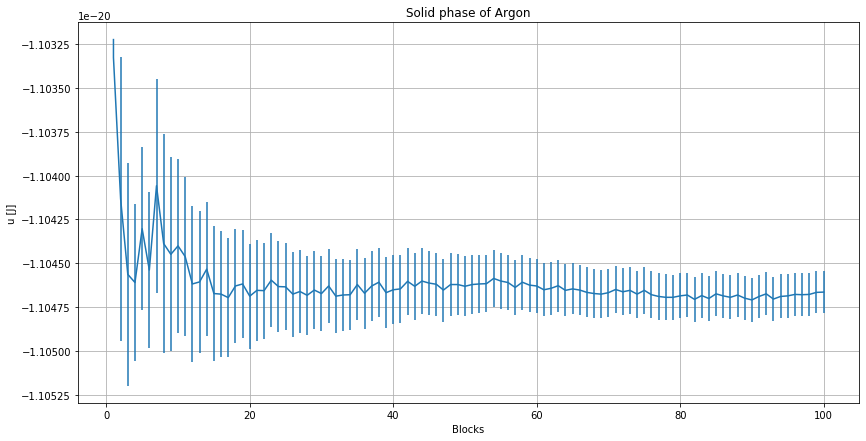

In [7]:
plt.figure(1, figsize= (14,7))    
plt.errorbar(x, u_sol_Ar, yerr=err_u_sol_Ar)
plt.xlabel('Blocks')
plt.ylabel('u [J]')
plt.title('Solid phase of Argon')
plt.grid(True)

## Kinetic energy

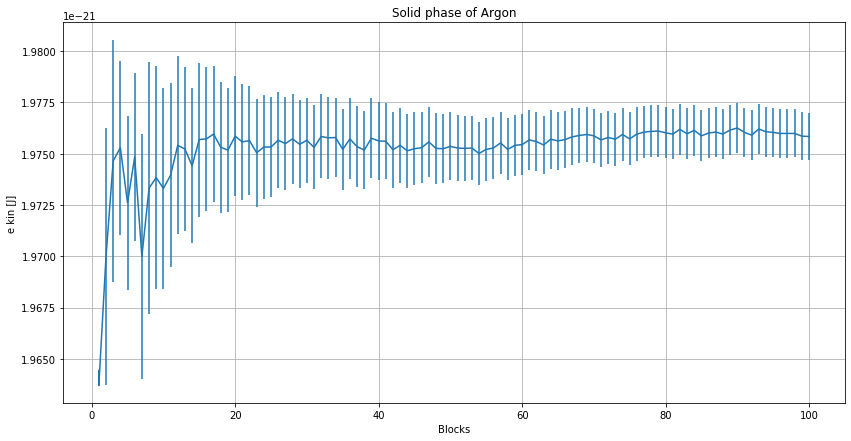

In [8]:
plt.figure(3, figsize= (14,7))    
plt.errorbar(x, k_sol_Ar, yerr=err_k_sol_Ar)
plt.xlabel('Blocks')
plt.ylabel('e kin [J]')
plt.title('Solid phase of Argon')
plt.grid(True)

## Temperature

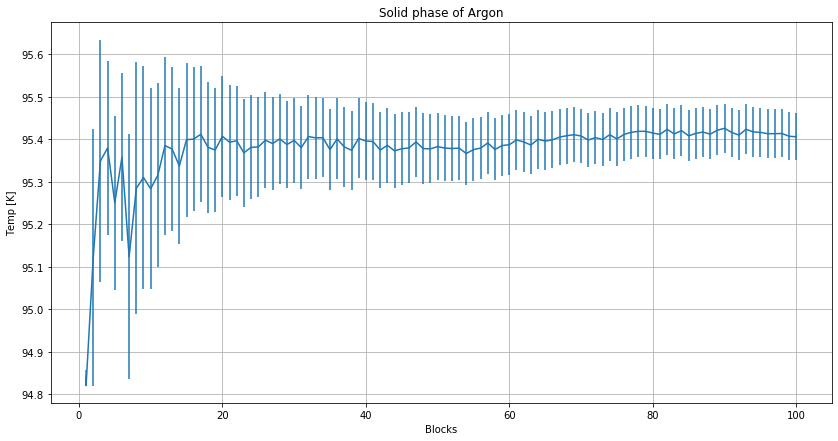

In [9]:
plt.figure(5, figsize= (14,7))    
plt.errorbar(x, temp_sol_Ar, yerr=err_temp_sol_Ar)
plt.xlabel('Blocks')
plt.ylabel('Temp [K]')
plt.title('Solid phase of Argon')
plt.grid(True)

## Total energy

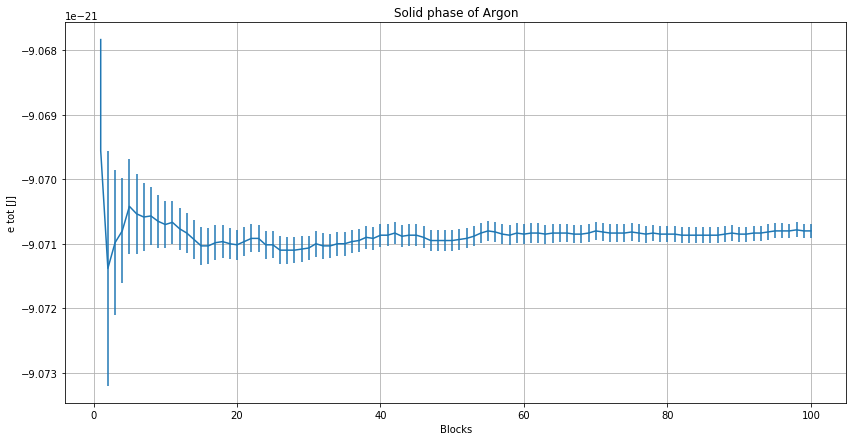

In [10]:
plt.figure(4, figsize= (14,7))    
plt.errorbar(x, etot_sol_Ar, yerr=err_etot_sol_Ar)
plt.xlabel('Blocks')
plt.ylabel('e tot [J]')
plt.title('Solid phase of Argon')
plt.grid(True)

## Pressure

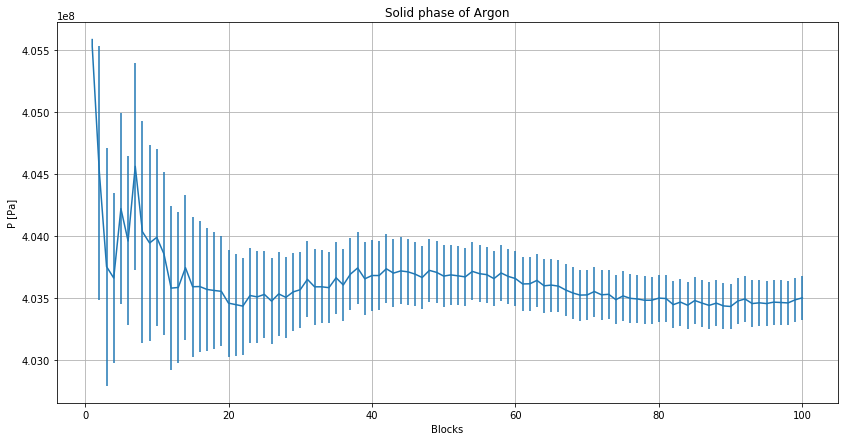

In [11]:
plt.figure(2, figsize= (14,7))    
plt.errorbar(x, p_sol_Ar, yerr=err_p_sol_Ar)
plt.xlabel('Blocks')
plt.ylabel('P [Pa]')
plt.title('Solid phase of Argon')
plt.grid(True)

# Liquid phase

In [23]:
#Changing from Lennard-Jones unities to SI unities
for i in range(len(u_liq_Ar)):
    u_liq_Ar[i]*=epsilon
    p_liq_Ar[i]*=(epsilon/(sigma*sigma*sigma))
    k_liq_Ar[i]*=epsilon
    etot_liq_Ar[i]*=epsilon
    temp_liq_Ar[i]*=epsilon/k_b
    
    err_u_liq_Ar[i]*=epsilon
    err_p_liq_Ar[i]*=(epsilon/(sigma*sigma*sigma))
    err_k_liq_Ar[i]*=epsilon
    err_etot_liq_Ar[i]*=epsilon
    err_temp_liq_Ar[i]*=epsilon/k_b

I studied the liquid phase of Argon with the following parameters:
 - $T = 1.1$
 - $\rho = 0.8$
 - $r_{cut} = 2.5$
 
Below the pictures of the observable of interest:

## Intenal energy

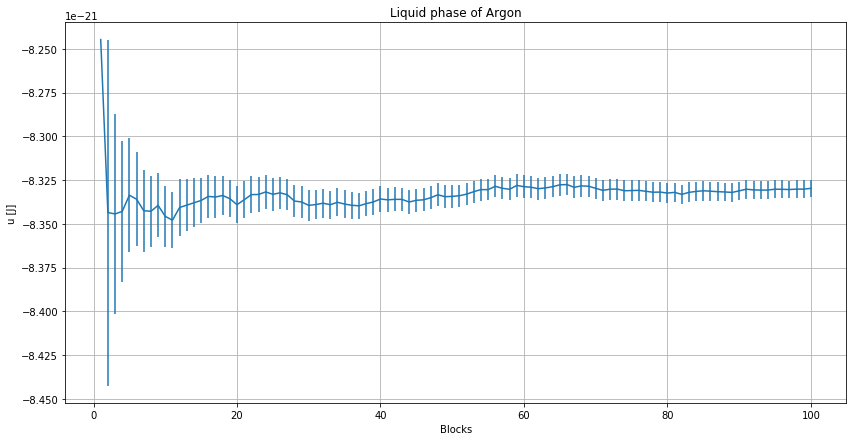

In [24]:
plt.figure(1, figsize= (14,7))    
plt.errorbar(x, u_liq_Ar, yerr=err_u_liq_Ar)
plt.xlabel('Blocks')
plt.ylabel('u [J]')
plt.title('Liquid phase of Argon')
plt.grid(True)

## Kinetic energy

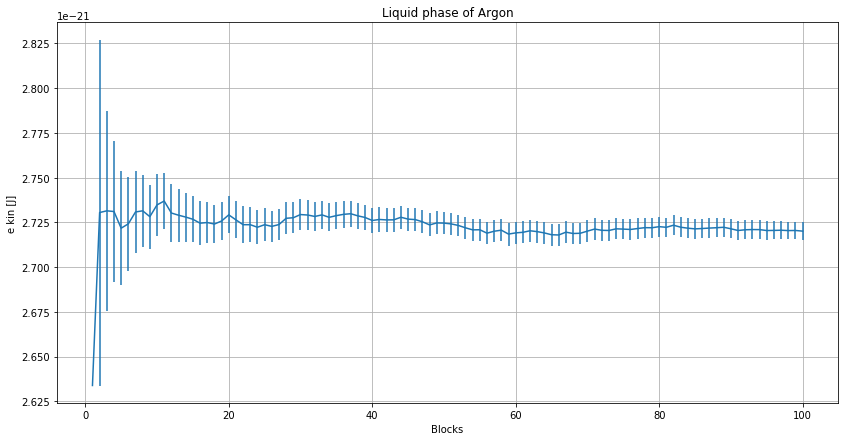

In [25]:
plt.figure(3, figsize= (14,7))    
plt.errorbar(x, k_liq_Ar, yerr=err_k_liq_Ar)
plt.xlabel('Blocks')
plt.ylabel('e kin [J]')
plt.title('Liquid phase of Argon')
plt.grid(True)

## Temperature

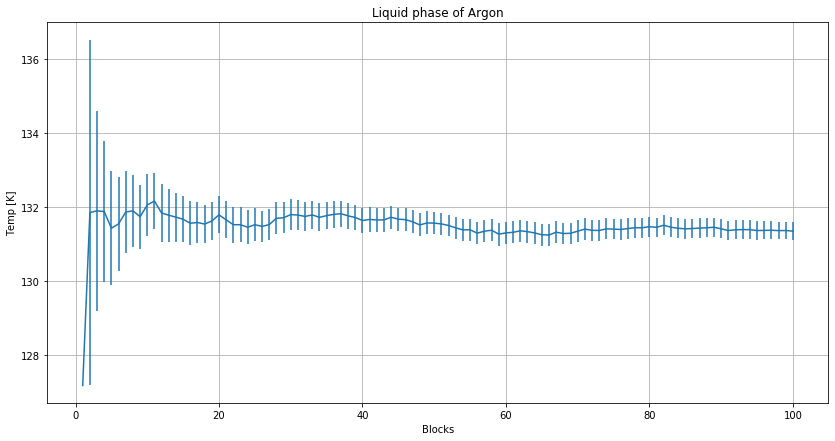

In [26]:
plt.figure(5, figsize= (14,7))    
plt.errorbar(x, temp_liq_Ar, yerr=err_temp_liq_Ar)
plt.xlabel('Blocks')
plt.ylabel('Temp [K]')
plt.title('Liquid phase of Argon')
plt.grid(True)

## Total Energy

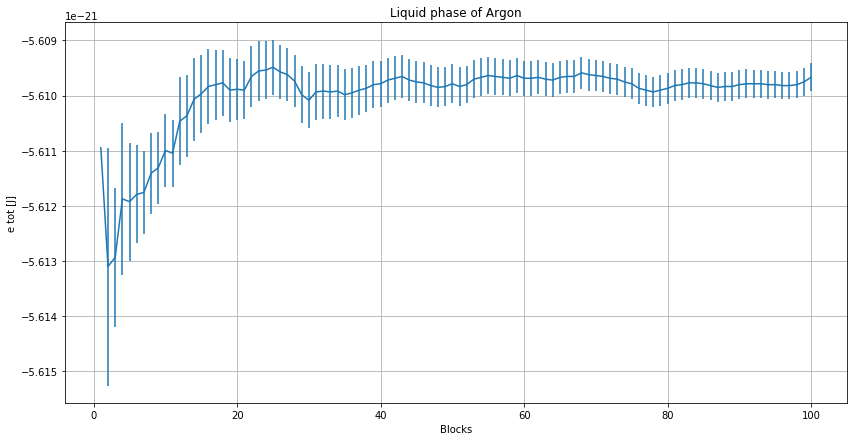

In [27]:
plt.figure(4, figsize= (14,7))    
plt.errorbar(x, etot_liq_Ar, yerr=err_etot_liq_Ar)
plt.xlabel('Blocks')
plt.ylabel('e tot [J]')
plt.title('Liquid phase of Argon')
plt.grid(True)

## Pressure

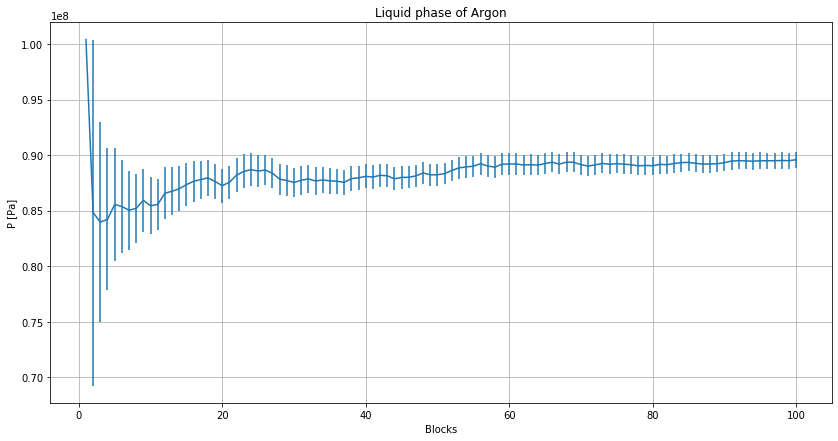

In [28]:
plt.figure(2, figsize= (14,7))    
plt.errorbar(x, p_liq_Ar, yerr=err_p_liq_Ar)
plt.xlabel('Blocks')
plt.ylabel('P [Pa]')
plt.title('Liquid phase of Argon')
plt.grid(True)

# Gas phase

In [30]:
#Changing from Lennard-Jones unities to SI unities
for i in range(len(u_gas_Ar)):
    u_gas_Ar[i]*=epsilon
    p_gas_Ar[i]*=(epsilon/(sigma*sigma*sigma))
    k_gas_Ar[i]*=epsilon
    etot_gas_Ar[i]*=epsilon
    temp_gas_Ar[i]*=epsilon/k_b
    
    err_u_gas_Ar[i]*=epsilon
    err_p_gas_Ar[i]*=(epsilon/(sigma*sigma*sigma))
    err_k_gas_Ar[i]*=epsilon
    err_etot_gas_Ar[i]*=epsilon
    err_temp_gas_Ar[i]*=epsilon/k_b

I studied the gas phase of Argon with the following parameters:
 - $T = 1.2$
 - $\rho = 0.05$
 - $r_{cut} = 5.0$
 
Below the pictures of the observable of interest:

## Intenal energy

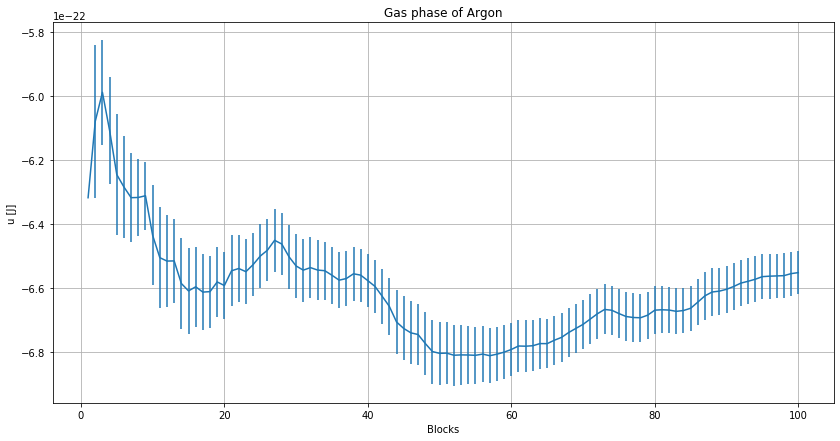

In [31]:
plt.figure(1, figsize= (14,7))    
plt.errorbar(x, u_gas_Ar, yerr=err_u_gas_Ar)
plt.xlabel('Blocks')
plt.ylabel('u [J]')
plt.title('Gas phase of Argon')
plt.grid(True)

## Kinetic energy

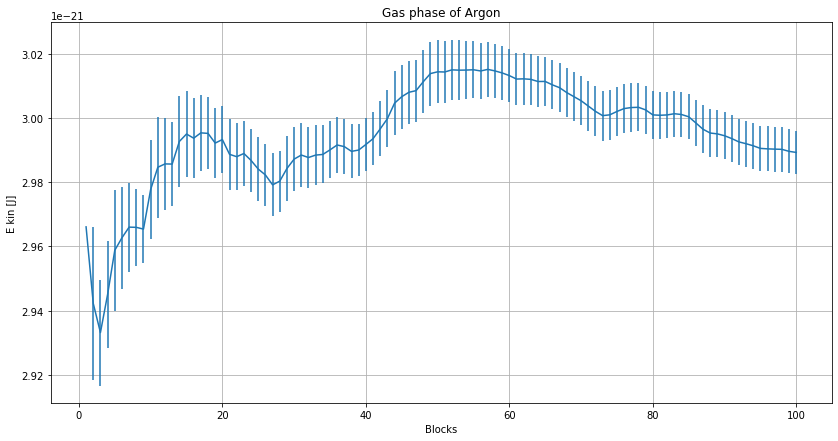

In [32]:
plt.figure(3, figsize= (14,7))    
plt.errorbar(x, k_gas_Ar, yerr=err_k_gas_Ar)
plt.xlabel('Blocks')
plt.ylabel('E kin [J]')
plt.title('Gas phase of Argon')
plt.grid(True)

## Temperature

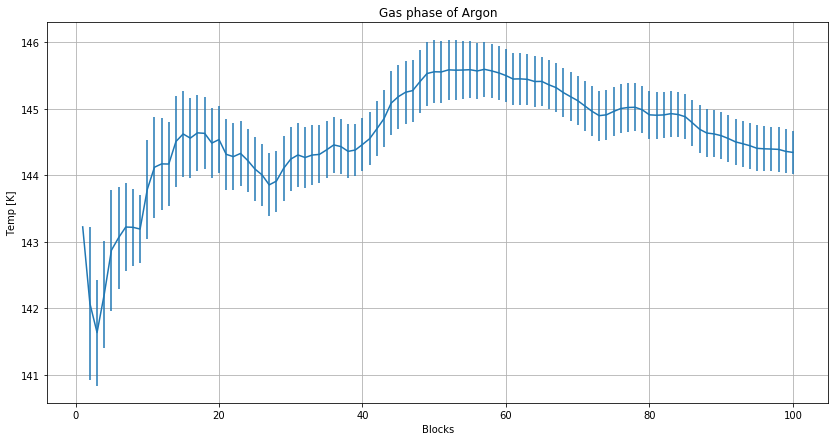

In [33]:
plt.figure(5, figsize= (14,7))    
plt.errorbar(x, temp_gas_Ar, yerr=err_temp_gas_Ar)
plt.xlabel('Blocks')
plt.ylabel('Temp [K]')
plt.title('Gas phase of Argon')
plt.grid(True)

## Total energy

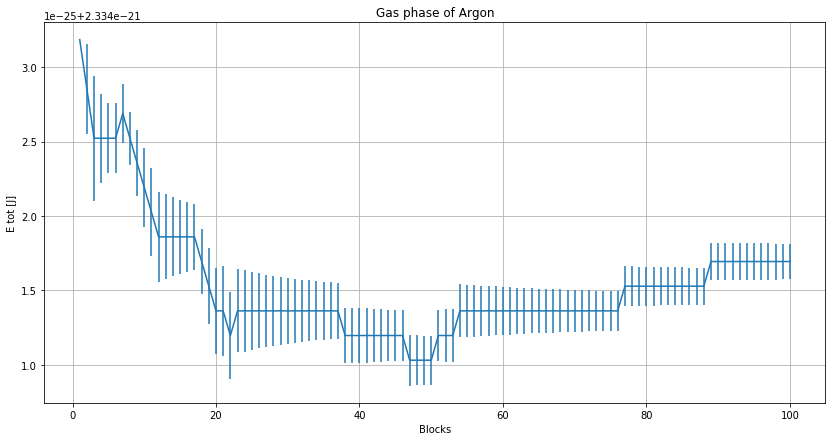

In [36]:
plt.figure(4, figsize= (14,7))    
plt.errorbar(x, etot_gas_Ar, yerr=err_etot_gas_Ar)
plt.xlabel('Blocks')
plt.ylabel('E tot [J]')
plt.title('Gas phase of Argon')
plt.grid(True)

## Pressure

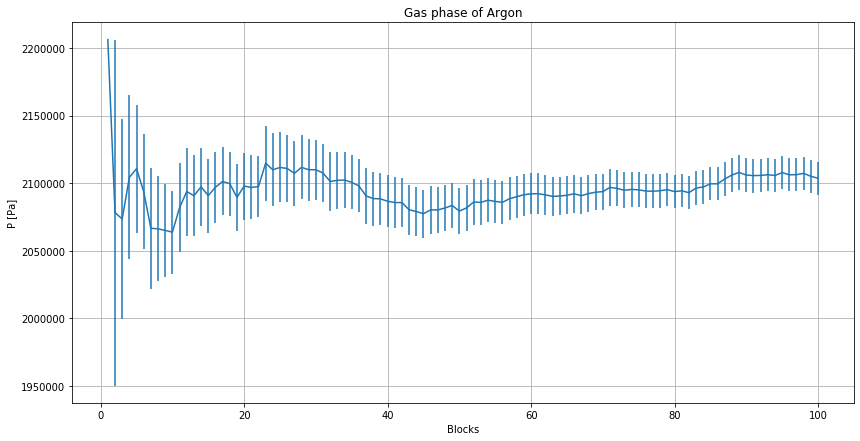

In [35]:
plt.figure(2, figsize= (14,7))    
plt.errorbar(x, p_gas_Ar, yerr=err_p_gas_Ar)
plt.xlabel('Blocks')
plt.ylabel('P [Pa]')
plt.title('Gas phase of Argon')
plt.grid(True)